In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
#Mnist 데이터셋 다운로드 후 데이터값 확인하기。
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

Label 5


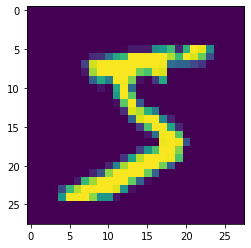

In [5]:
plt.imshow(train_images[0])
print('Label', train_labels[0])

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
#전처리
#학습용으로 차원을 reshape
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

In [8]:
#정규화(Nomalization) 픽셀값을 0~1 사이로 정규화 합니다.
train_images,test_images = train_images/255.0, test_images/255.0

In [9]:
#합성곱층 CNN 네트워크(모델) 만듬
model = models.Sequential(name='Kim')
model.add(layers.Conv2D(20, (4,4), activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(30, (4,4), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(40, (3,3), activation='relu'))

In [10]:
#마지막 레이어에 Dense층 추가하기
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
#이 부분이 바이너리,멀티분류냐에 따라 설계가 달라짐
model.add(layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "Kim"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 20)        340       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 30)          9630      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 40)          10840     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               20608   

In [12]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=7)

Train on 60000 samples
Epoch 1/7
60000/60000 [==============================] - 21s 348us/sample - loss: 0.1960 - accuracy: 0.9401
Epoch 2/7
60000/60000 [==============================] - 18s 303us/sample - loss: 0.0651 - accuracy: 0.9802
Epoch 3/7
60000/60000 [==============================] - 18s 307us/sample - loss: 0.0470 - accuracy: 0.9860
Epoch 4/7
60000/60000 [==============================] - 19s 318us/sample - loss: 0.0375 - accuracy: 0.9881
Epoch 5/7
60000/60000 [==============================] - 23s 386us/sample - loss: 0.0292 - accuracy: 0.9909
Epoch 6/7
60000/60000 [==============================] - 23s 380us/sample - loss: 0.0258 - accuracy: 0.9918
Epoch 7/7
60000/60000 [==============================] - 26s 432us/sample - loss: 0.0207 - accuracy: 0.9932


In [ ]:
#모델을 예측해 봅시다.
model.predict(train_images[[0]])

In [15]:
import numpy as np

In [16]:
np.argmax(model.predict(train_images[[0]]))

5

Label 5


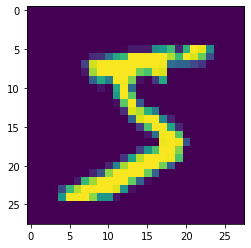

In [17]:

plt.imshow(train_images[0].reshape(28,28))
print('Label', train_labels[0])

In [18]:
#아직 학습하지않은 10000장 데이터 학습
test_images.shape

(10000, 28, 28, 1)

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels,verbose=2)

10000/1 - 1s - loss: 0.0175 - accuracy: 0.9907


In [20]:
model.predict(test_images[[0]])

array([[1.5420187e-09, 1.8613791e-08, 7.0173832e-07, 7.1022114e-08,
        9.0273687e-08, 1.3830928e-09, 3.9042158e-13, 9.9999917e-01,
        4.2295742e-08, 4.6416563e-08]], dtype=float32)

In [21]:
np.argmax(model.predict(test_images[[0]]))

7

Label 7


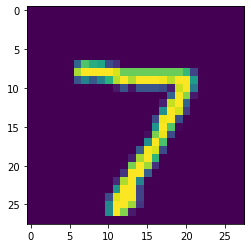

In [22]:

plt.imshow(test_images[0].reshape(28,28))
print('Label', test_labels[0])

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7)

In [24]:
train_images.shape

(60000, 28, 28, 1)

In [25]:
train_images.reshape(60000, 28*28)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
train_images.shape

(60000, 28, 28, 1)

In [27]:
train_images = train_images.reshape(60000, 28*28)

In [28]:
train_images.shape

(60000, 784)

In [29]:
knn.fit(train_images, train_labels)

KNeighborsClassifier(n_neighbors=7)

In [30]:
knn.predict([train_images[1]])

array([0], dtype=uint8)

In [31]:
test_images = test_images.reshape(10000, 28*28)

In [32]:
knn.predict([test_images[1]])

array([2], dtype=uint8)

In [33]:
knn.predict([test_images[1]])

array([2], dtype=uint8)

In [34]:
knn.fit(test_images, test_labels)

KNeighborsClassifier(n_neighbors=7)

In [35]:
mini_images  = test_images[:100]

In [36]:
mini_y = test_labels[:100]

In [37]:
knn.score(mini_images, mi)

NameError: name 'mi' is not defined